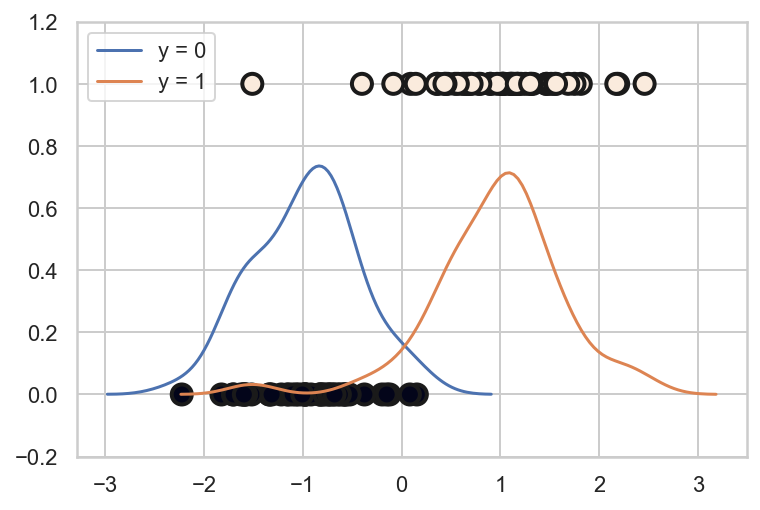

In [2]:
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1,
                            n_clusters_per_class=1, random_state=4)
X = sm.add_constant(X0)

plt.scatter(X0, y, c=y, s=100, edgecolor="k", linewidth=2)
sns.distplot(X0[y == 0, :], label="y = 0", hist=False)
sns.distplot(X0[y == 1, :], label="y = 1", hist=False)
plt.ylim(-0.2, 1.2)
plt.show()

In [3]:
logit_mod = sm.Logit(y,X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Thu, 02 Jan 2020   Pseudo R-squ.:                  0.7679
Time:                        19:19:58   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


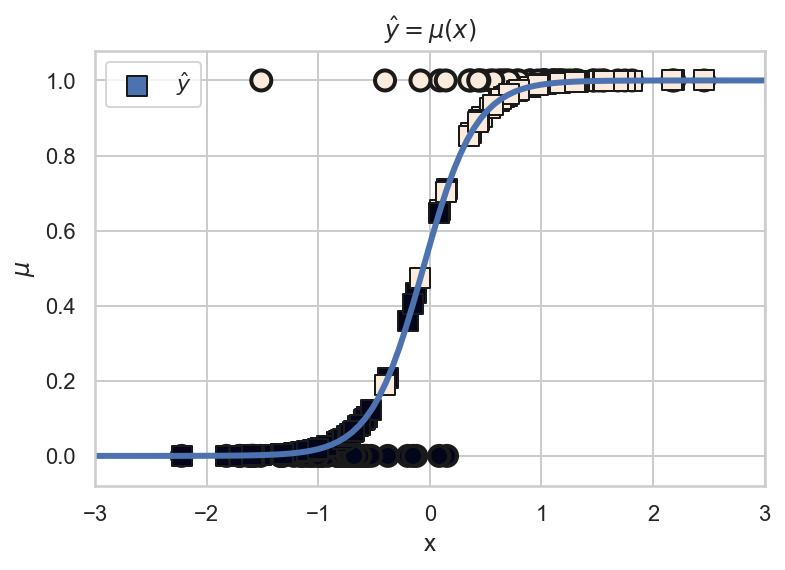

In [4]:
xx = np.linspace(-3, 3, 100)
mu = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, mu, lw=3)
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2)
plt.scatter(X0, logit_res.predict(X), label=r"$\hat{y}$", marker='s', c=y,
            s=100, edgecolor="k", lw=1)
plt.xlim(-3, 3)
plt.xlabel("x")
plt.ylabel(r"$\mu$")
plt.title(r"$\hat{y} = \mu(x)$")
plt.legend()
plt.show()

In [116]:
from sklearn.datasets import load_iris
iris = load_iris()

In [117]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [118]:
df.loc[df["species"] == "virginica", "result"] = 1
df.loc[df["species"] == "versicolor", "result"] = 0

In [119]:
index_ls = list(df.loc[df["species"] == "setosa"].index)
df = df.drop(index_ls).reset_index(drop=True)
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,result
95,6.7,3.0,5.2,2.3,virginica,1.0
96,6.3,2.5,5.0,1.9,virginica,1.0
97,6.5,3.0,5.2,2.0,virginica,1.0
98,6.2,3.4,5.4,2.3,virginica,1.0
99,5.9,3.0,5.1,1.8,virginica,1.0


In [120]:
columns = ["sepal_length","sepal_width", "petal_length", "petal_width", "species", "result"]
df.columns = columns
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,result
0,7.0,3.2,4.7,1.4,versicolor,0.0
1,6.4,3.2,4.5,1.5,versicolor,0.0
2,6.9,3.1,4.9,1.5,versicolor,0.0
3,5.5,2.3,4.0,1.3,versicolor,0.0
4,6.5,2.8,4.6,1.5,versicolor,0.0


In [53]:
from sklearn.metrics import confusion_matrix
y_hat = list(logit_res.predict(X))
y_pred = []
for i in y_hat:
    if i > 0.5:
        a = 1
        y_pred.append(a)
    else:
        a = 0
        y_pred.append(a)
confusion_matrix(y, y_pred)

array([[45,  5],
       [ 6, 44]], dtype=int64)

In [32]:
df.loc[df["species"] == "setosa", "result"] = 0
df.loc[df["species"] == "versicolor", "result"] = 1

In [33]:
index_ls = list(df.loc[df["species"] == "virginica"].index)
df = df.drop(index_ls).reset_index(drop=True)
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,result
95,5.7,3.0,4.2,1.2,versicolor,1.0
96,5.7,2.9,4.2,1.3,versicolor,1.0
97,6.2,2.9,4.3,1.3,versicolor,1.0
98,5.1,2.5,3.0,1.1,versicolor,1.0
99,5.7,2.8,4.1,1.3,versicolor,1.0


In [38]:
27.8315/5.1403

5.414372701982375

- μ(x)=σ(5.1403x-27.8315)
- threshold = 5.4143

In [53]:
from sklearn.metrics import confusion_matrix
y_hat = list(logit_res.predict(X))
y_pred = []
for i in y_hat:
    if i > 0.5:
        a = 1
        y_pred.append(a)
    else:
        a = 0
        y_pred.append(a)
confusion_matrix(y, y_pred)

array([[45,  5],
       [ 6, 44]], dtype=int64)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred, target_names=['setosa', 'versicolor']))

              precision    recall  f1-score   support

      setosa       0.88      0.90      0.89        50
  versicolor       0.90      0.88      0.89        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



In [55]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, logit_res.fittedvalues)
fpr, tpr, thresholds

(array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.02, 0.06, 0.06, 0.1 , 0.2 , 0.22, 0.28, 0.44, 0.6 , 0.68, 0.78,
        0.82, 0.9 , 0.92, 0.98, 1.  ]),
 array([0.  , 0.02, 0.06, 0.12, 0.16, 0.18, 0.22, 0.28, 0.32, 0.48, 0.52,
        0.58, 0.68, 0.78, 0.88, 0.9 , 0.9 , 0.92, 0.94, 0.98, 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  ]),
 array([ 9.15090198,  8.15090198,  7.12283475,  6.60880114,  6.09476752,
         5.58073391,  5.0667003 ,  4.55266668,  4.03863307,  3.01056584,
         2.49653223,  1.98249861,  1.468465  ,  0.95443139,  0.44039777,
        -0.07363584, -0.58766946, -1.10170307, -1.61573668, -2.1297703 ,
        -2.64380391, -3.15783753, -3.67187114, -4.18590475, -4.69993837,
        -5.21397198, -5.72800559]))

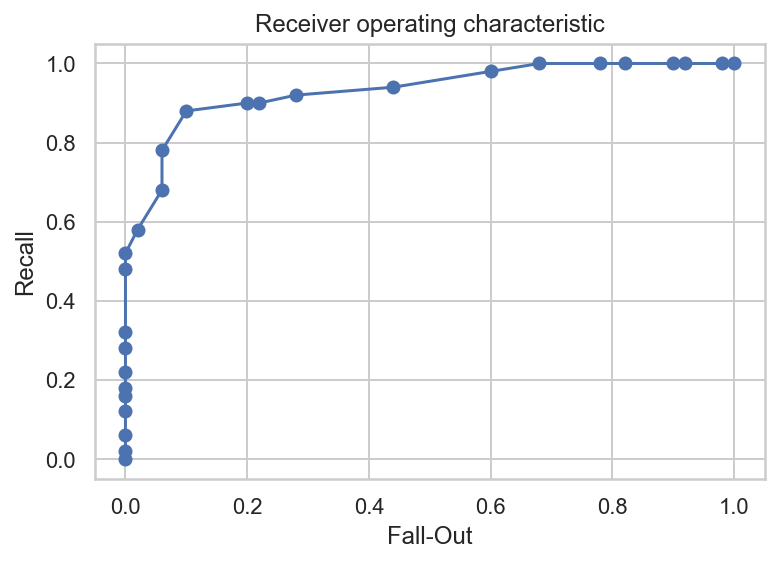

In [57]:
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic')
plt.show()

In [65]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9326

In [138]:
idx = np.in1d(iris.target, [1,2])
X0 = pd.DataFrame(iris.data[idx,:], columns=iris.feature_names)
X = sm.add_constant(X0)
y = iris.target[idx]
y[y==1] = 0
y[y==2] = 1

In [139]:
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Thu, 02 Jan 2020   Pseudo R-squ.:                  0.9142
Time:                        21:12:27   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.947e-26
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -42.6378     25.708     -1.659      0.097     -93.024       7.748
sepal length (cm)    -2.4652      2.394     -1.030      0.303      -7.158       2.228
sepal width (cm)     -6.

In [147]:
from sklearn.metrics import confusion_matrix
y_hat = logit_res.predict(X)
y_hat[y_hat > 0.5] = 1
y_hat[y_hat <= 0.5] = 0
confusion_matrix(y, y_hat)

array([[49,  1],
       [ 1, 49]], dtype=int64)

In [141]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred, target_names=['setosa', 'versicolor']))

              precision    recall  f1-score   support

      setosa       0.98      0.98      0.98        50
  versicolor       0.98      0.98      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [143]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, logit_res.fittedvalues)
fpr, tpr, thresholds

(array([0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.02, 0.08, 0.08, 1.  ]),
 array([0.  , 0.02, 0.62, 0.66, 0.92, 0.92, 0.98, 0.98, 1.  , 1.  ]),
 array([ 29.13056685,  28.13056685,   8.17633988,   7.85904849,
          2.0990656 ,   1.88016338,   0.70430911,  -1.23771599,
         -1.35610507, -23.50973831]))

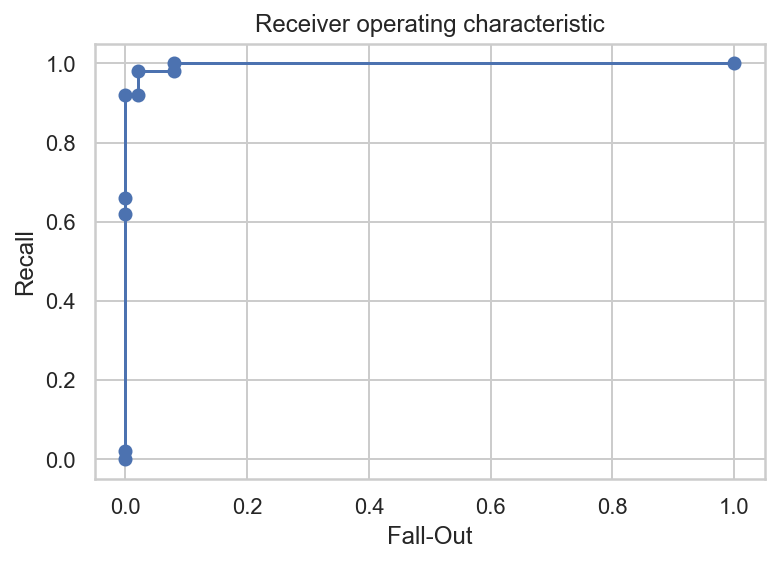

In [144]:
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic')
plt.show()

In [145]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9972000000000001

In [149]:
data_med = sm.datasets.get_rdataset("MedGPA", package="Stat2Data")
df_med = data_med.data
df_med.tail()

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
50,D,0,M,2.41,2.72,8,8,8.0,8,32,7
51,D,0,M,3.51,3.56,11,8,6.0,9,34,6
52,A,1,F,3.43,3.48,7,10,7.0,10,34,14
53,D,0,M,2.61,2.80,7,5,NaN,6,18,6
54,D,0,M,3.36,3.44,11,11,8.0,9,39,1


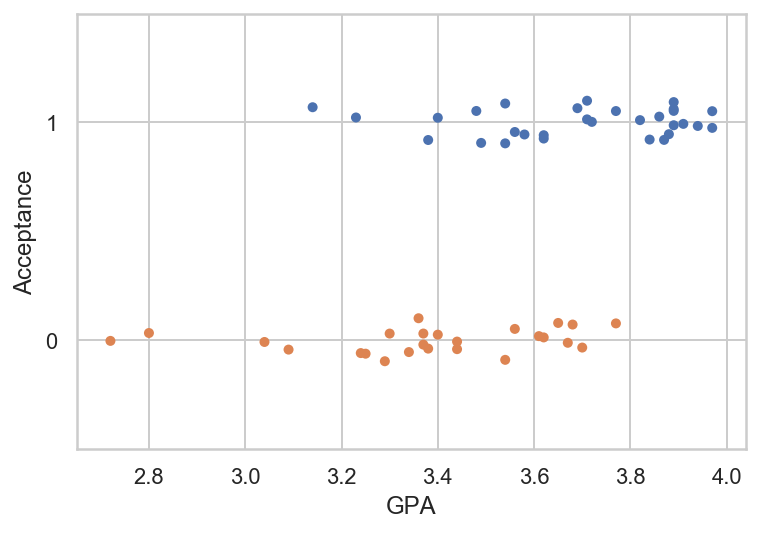

In [150]:
sns.stripplot(x="GPA", y="Acceptance", data=df_med,
              jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()

In [151]:
model_med = sm.Logit.from_formula("Acceptance ~ Sex + BCPM + GPA + VR + PS + WS + BS + Apps", df_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.280736
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   54
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            8
Date:                Thu, 02 Jan 2020   Pseudo R-squ.:                  0.5913
Time:                        21:35:58   Log-Likelihood:                -15.160
converged:                       True   LL-Null:                       -37.096
Covariance Type:            nonrobust   LLR p-value:                 6.014e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.6414     15.600     -2.990      0.003     -77.216     -16.067
Sex[T.M]      -2.2835      1.

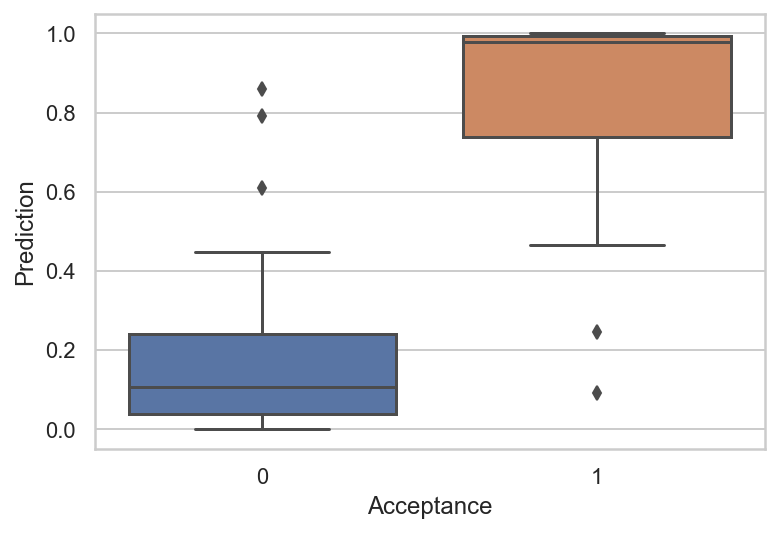

In [152]:
df_med["Prediction"] = result_med.predict(df_med)
sns.boxplot(x="Acceptance", y="Prediction", data=df_med)
plt.show()

In [153]:
model_med = sm.Logit.from_formula("Acceptance ~ PS + BS", df_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.460609
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   55
Model:                          Logit   Df Residuals:                       52
Method:                           MLE   Df Model:                            2
Date:                Thu, 02 Jan 2020   Pseudo R-squ.:                  0.3315
Time:                        21:36:36   Log-Likelihood:                -25.333
converged:                       True   LL-Null:                       -37.896
Covariance Type:            nonrobust   LLR p-value:                 3.503e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.5427      4.684     -3.318      0.001     -24.723      -6.362
PS             0.4798      0.